In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/School/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [15]:
# Use one hot encoding to convert the "test preparation course" and "race/ethnicity" columns
df['test preparation course'] = df['test preparation course'].replace({'none': 0, 'completed': 1})
df['race/ethnicity'] = df['race/ethnicity'].replace({'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5})

# calculate the composite score and create a new column
df['composite score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# round the composite score to the nearest whole number
df['composite score'] = round(df['composite score'])

# Save the cleaned data to a new CSV file
df.to_csv('/content/drive/MyDrive/School/studentsPerformance_cleaned.csv', index=False)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,composite score
0,female,2,bachelor's degree,standard,0,72,72,74,73.0
1,female,3,some college,standard,1,69,90,88,82.0
2,female,2,master's degree,standard,0,90,95,93,93.0
3,male,1,associate's degree,free/reduced,0,47,57,44,49.0
4,male,3,some college,standard,0,76,78,75,76.0
...,...,...,...,...,...,...,...,...,...
995,female,5,master's degree,standard,1,88,99,95,94.0
996,male,3,high school,free/reduced,0,62,55,55,57.0
997,female,3,high school,free/reduced,1,59,71,65,65.0
998,female,4,some college,standard,1,68,78,77,74.0


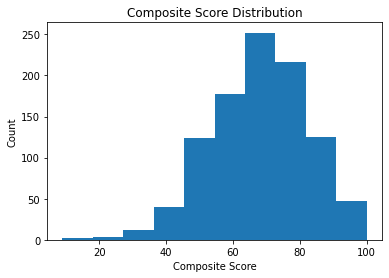

In [13]:
# Histogram of composite scores

plt.hist(df['composite score'], bins=10)
plt.title('Composite Score Distribution')
plt.xlabel('Composite Score')
plt.ylabel('Count')
plt.show()

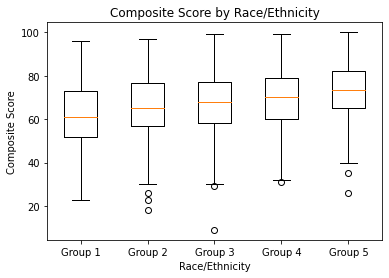

In [16]:
# Box plot of composite scores by race/ethnicity

fig, ax = plt.subplots()
ax.boxplot([df.loc[df['race/ethnicity'] == i, 'composite score'] for i in range(1, 6)])
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])
plt.title('Composite Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Composite Score')
plt.show()

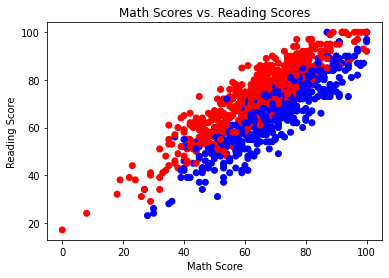

In [17]:
# Scatter plot of math scores vs. reading scores, colored by gender

colors = {'male': 'blue', 'female': 'red'}
plt.scatter(df['math score'], df['reading score'], c=df['gender'].map(colors))
plt.title('Math Scores vs. Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

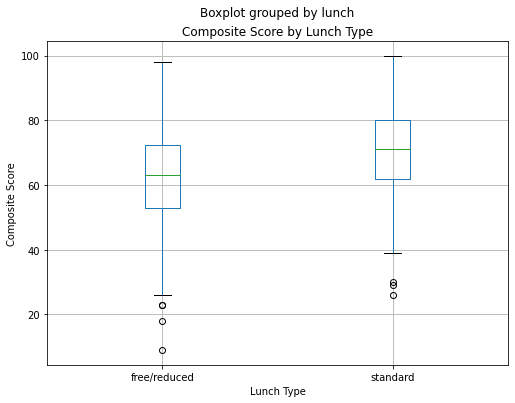

In [18]:
# Create a box plot of composite scores by lunch category

df.boxplot('composite score', by='lunch', figsize=(8,6))
plt.title('Composite Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Composite Score')
plt.show()

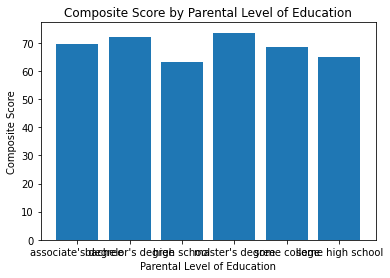

In [19]:
# Group the data by parental level of education and calculate the mean composite score
grouped_data = df.groupby('parental level of education')['composite score'].mean()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)

# Set the title and axis labels
plt.title('Composite Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Composite Score')

# Show the plot
plt.show()

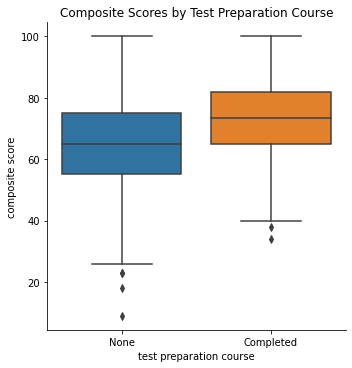

In [24]:
import seaborn as sns

# create the box plot
g = sns.catplot(x='test preparation course', y='composite score', kind='box', data=df)

# set the new x-labels
g.ax.set_xticklabels(['None', 'Completed'])

# add a title
plt.title('Composite Scores by Test Preparation Course')

# display the plot
plt.show()